# Assignment 1 - Regression (normal equation)

In [148]:
# Usual Imports

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn.model_selection as skms
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
from sklearn.linear_model import LinearRegression

1. Read the data

In [6]:
data = pd.read_csv("../Data/bottle.csv",low_memory=False)
data.shape

(864863, 74)

In [9]:
extracted_data_1 = data[['T_degC', 'Salnty', 'STheta']]
extracted_data_1 = extracted_data_1.dropna()
extracted_data_1.shape

(812174, 3)

2. Plotting the data

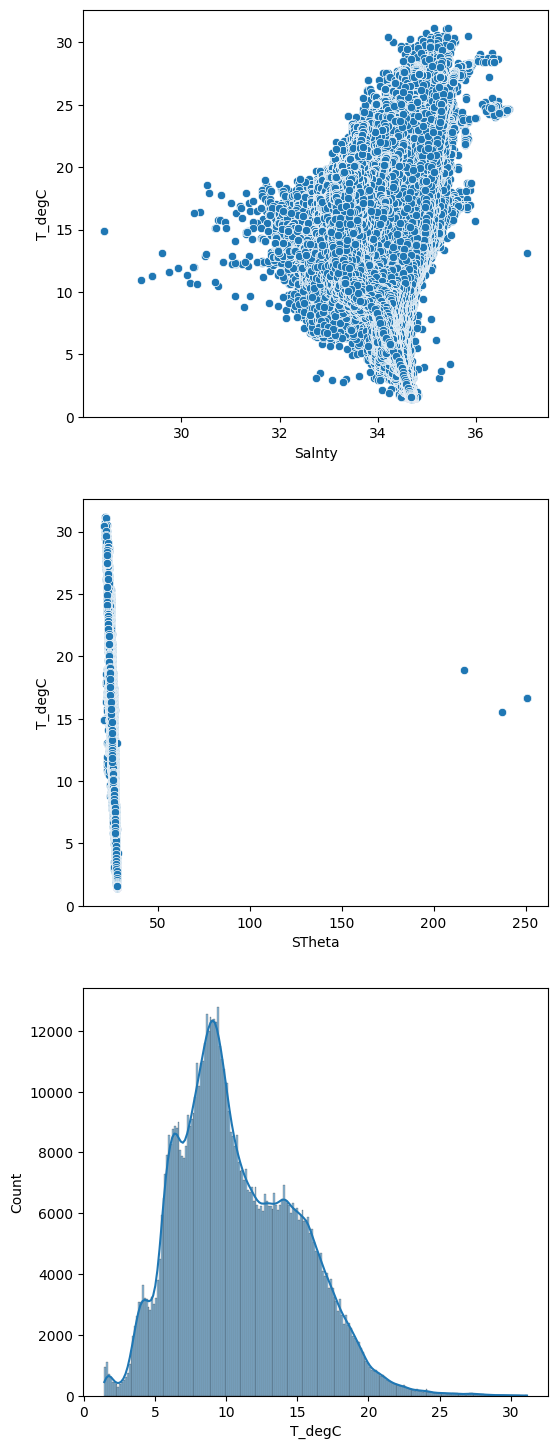

In [29]:
fig_1,axes_1 = plt.subplots(3,1,figsize=(6,18))
sl_t_deg = sns.scatterplot(data=extracted_data_1,x="Salnty",y="T_degC",ax=axes_1[0])
st_t_deg = sns.scatterplot(data=extracted_data_1,x="STheta",y="T_degC",ax=axes_1[1])
t_deg = sns.histplot(data=extracted_data_1,x="T_degC", kde=True,ax=axes_1[2])

In [28]:
extracted_data_2 = extracted_data_1[extracted_data_1["STheta"]<=50]
extracted_data_2.shape

(812168, 3)

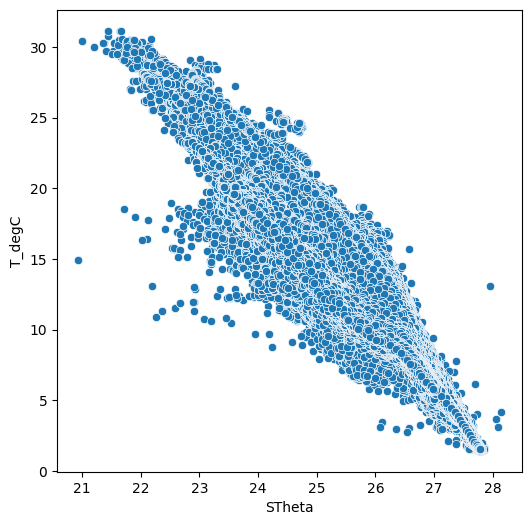

In [32]:
fig_2,axes_2 = plt.subplots(1,1,figsize=(6,6))
st_t_deg = sns.scatterplot(data=extracted_data_2,x="STheta",y="T_degC",ax=axes_2)

2. SKLearn Linear Regression Train Test Split 

In [61]:
X_train,X_test,y_train,y_test = skms.train_test_split(extracted_data_2[["STheta","Salnty"]],extracted_data_2["T_degC"],test_size=0.30, random_state=42)

3. Create a class to perform Linear Regression using the normal Equation

In [151]:
class NormalLinearRegression:
    
    def fit(self,X,y):
        betas = np.c_[np.ones((X.shape[0], 1)), X]
        self.thetas = np.linalg.inv(betas.T.dot(betas)).dot(betas.T).dot(y)
    def predict(self,X):
        beta_pred = np.c_[np.ones((X.shape[0], 1)), X]
        return beta_pred.dot(self.thetas)


In [152]:
def find_metrics(y_test,y_pred):
    mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
    r2_scores = r2_score(y_true=y_test,y_pred=y_pred)
    exp_var = explained_variance_score(y_true=y_test,y_pred=y_pred)
    return pd.DataFrame({"MSE" : [mse],"R Squared Score": [r2_scores],"Explained Variance": [exp_var]})

In [150]:
norm_lin_reg = NormalLinearRegression()
norm_lin_reg.fit(X_train,y_train)
print(norm_lin_reg.thetas)
norm_y_pred = norm_lin_reg.predict(X_test)
find_metrics(y_test=y_test.values,y_pred=norm_y_pred)

[35.6504482  -5.03872733  3.11107278]


,MSE,R Squared Score,Explained Variance
0,0.233076,0.986922,0.986922


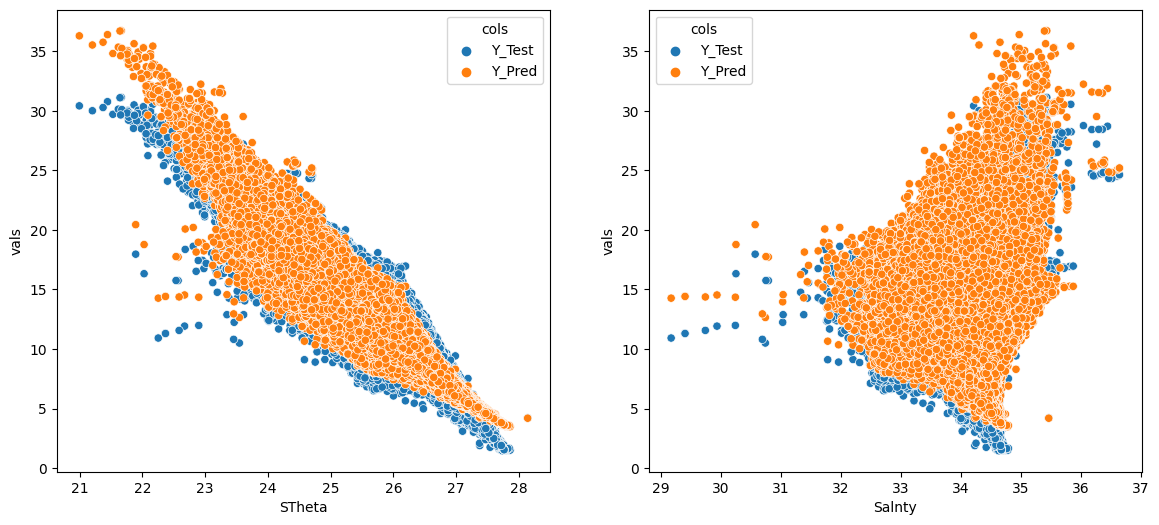

In [122]:
plot_data = pd.DataFrame({"Y_Test":y_test,"Y_Pred":y_pred}) 
plot_data["STheta"] = X_test["STheta"].values
plot_data["Salnty"] = X_test["Salnty"].values
plot_data
stacked_data = plot_data.melt(["STheta","Salnty"], var_name='cols', value_name='vals')
stacked_data
fig_2,axes_2 = plt.subplots(1,2,figsize=(14,6))
st_t_deg = sns.scatterplot(data = stacked_data,x="STheta",y="vals",hue="cols",ax=axes_2[0])
st_t_deg = sns.scatterplot(data = stacked_data,x="Salnty",y="vals",hue="cols",ax=axes_2[1])

In [74]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_)
lin_y_pred = lin_reg.predict(X_test)

35.65044819418292 [-5.03872733  3.11107278]


In [75]:
mse = mean_squared_error(y_true=y_test,y_pred=lin_y_pred)
r2_score = r2_score(y_true=y_test,y_pred=lin_y_pred)
exp_var = explained_variance_score(y_true=y_test,y_pred=lin_y_pred)
lin_score_df = pd.DataFrame({"MSE" : [mse],"R Squared Score": [r2_score],"Explained Variance": [exp_var]})
lin_score_df

,MSE,R Squared Score,Explained Variance
0,0.233076,0.986922,0.986922


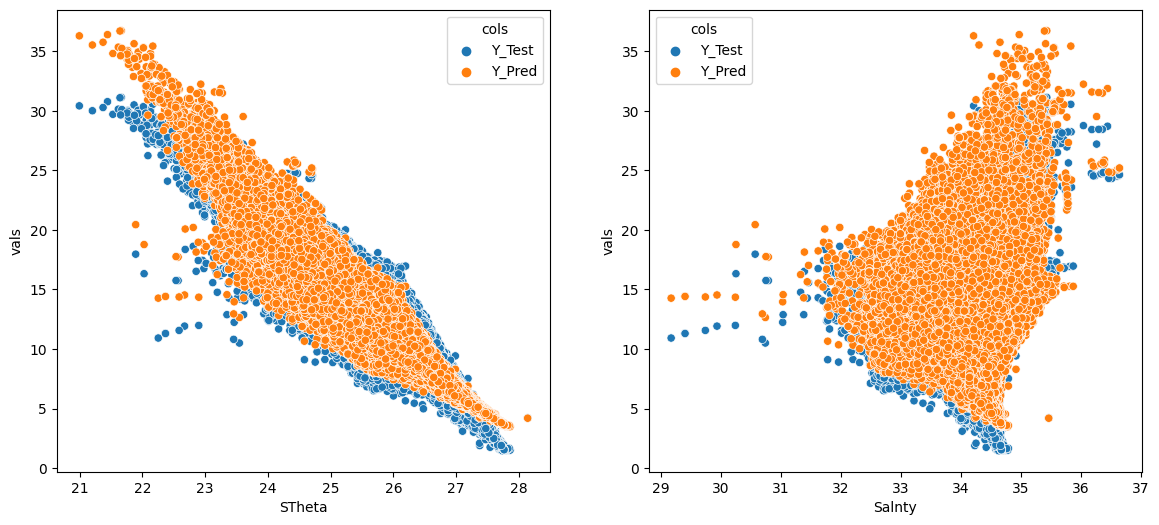

In [121]:
lin_plot_data = pd.DataFrame({"Y_Test":y_test,"Y_Pred":lin_y_pred}) 
lin_plot_data["STheta"] = X_test["STheta"].values
lin_plot_data["Salnty"] = X_test["Salnty"].values
lin_stacked_data = lin_plot_data.melt(["STheta","Salnty"], var_name='cols', value_name='vals')
fig_2,axes_2 = plt.subplots(1,2,figsize=(14,6))
st_t_deg = sns.scatterplot(data = lin_stacked_data,x="STheta",y="vals",hue="cols",ax=axes_2[0])
st_t_deg = sns.scatterplot(data = lin_stacked_data,x="Salnty",y="vals",hue="cols",ax=axes_2[1])